In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train=pd.read_csv('C:/Users/Srijan-PC/Downloads/train.csv')

In [3]:
test=pd.read_csv('C:/Users/Srijan-PC/Downloads/test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_id = train['Id']
test_id = test['Id']

In [6]:
train=train.drop(['Id'],axis=1)

In [7]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test=test.drop(['Id'],axis=1)

In [9]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

Correlation checking in train data with SalesPrice with corr value more than 0.5

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


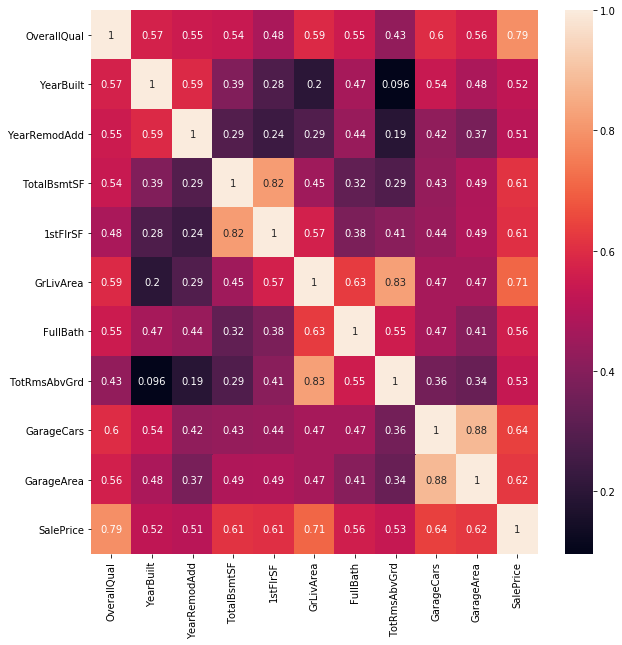

In [11]:
correlated = train.corr()
high_corelated_variable = correlated[correlated['SalePrice'] > 0.5].index
print(high_corelated_variable)
plt.figure(figsize = (10,10))
g = sns.heatmap(train[high_corelated_variable].corr(), annot=True);

Dropping SalesPrice column from train set since we want to predict it hence moved it to dependant feature in Y-col, and also combined the train and test dataset as all_data given above for wrangling purpose:

In [12]:
Y_col = train['SalePrice']

train = train.drop(columns = 'SalePrice')

all_data = pd.concat((train,test), sort=False)

print(test.shape)
print(train.shape)

(1459, 79)
(1460, 79)


Checking mising value via heatmap plot:

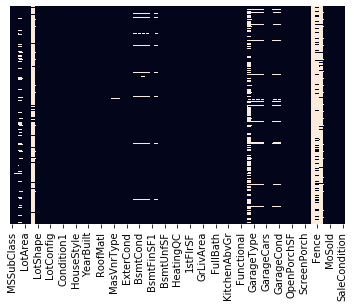

In [13]:
sns.heatmap(all_data.isnull(),yticklabels=False,cbar=False)

In [14]:
all_data['Fence'].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [15]:
all_data['Fence'].isnull().sum()

2348

In [16]:
all_data.drop(['PoolQC','Fence','MiscFeature','Alley'],axis=1,inplace=True)

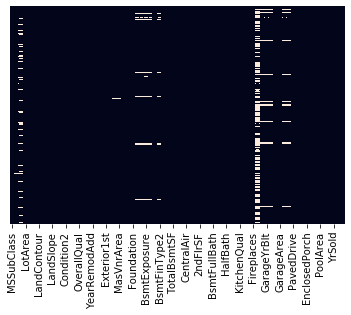

In [17]:
sns.heatmap(all_data.isnull(),yticklabels=False,cbar=False)

In [18]:
all_data['FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [19]:
all_data['GarageType'].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

Filling all the missing categorical features with mode:

In [20]:
all_data['FireplaceQu']=all_data['FireplaceQu'].fillna(all_data['FireplaceQu'].mode()[0])
all_data['BsmtCond']=all_data['BsmtCond'].fillna(all_data['BsmtCond'].mode()[0])
all_data['BsmtQual']=all_data['BsmtQual'].fillna(all_data['BsmtQual'].mode()[0])
all_data['BsmtExposure']=all_data['BsmtExposure'].fillna(all_data['BsmtExposure'].mode()[0])
all_data['BsmtFinType1']=all_data['BsmtFinType1'].fillna(all_data['BsmtFinType1'].mode()[0])
all_data['BsmtFinType2']=all_data['BsmtFinType2'].fillna(all_data['BsmtFinType2'].mode()[0])
all_data['MasVnrType']=all_data['MasVnrType'].fillna(all_data['MasVnrType'].mode()[0])
all_data['GarageType']=all_data['GarageType'].fillna(all_data['GarageType'].mode()[0])
all_data['GarageFinish']=all_data['GarageFinish'].fillna(all_data['GarageFinish'].mode()[0])
all_data['GarageQual']=all_data['GarageQual'].fillna(all_data['GarageQual'].mode()[0])
all_data['GarageCond']=all_data['GarageCond'].fillna(all_data['GarageCond'].mode()[0])
all_data['MSZoning']=all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Utilities']=all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])
all_data['KitchenQual']=all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Functional']=all_data['Functional'].fillna(all_data['Functional'].mode()[0])

Filling all the missing numerical features with mean:

In [21]:
all_data['MasVnrArea']=all_data['MasVnrArea'].fillna(all_data['MasVnrArea'].mean())
all_data['LotFrontage']=all_data['LotFrontage'].fillna(all_data['LotFrontage'].mean())
all_data['GarageYrBlt']=all_data['GarageYrBlt'].fillna(all_data['GarageYrBlt'].mean())
all_data['GarageCars']=all_data['GarageCars'].fillna(all_data['GarageCars'].mean())
all_data['GarageArea']=all_data['GarageArea'].fillna(all_data['GarageArea'].mean())
all_data['BsmtFullBath']=all_data['BsmtFullBath'].fillna(all_data['BsmtFullBath'].mean())
all_data['BsmtHalfBath']=all_data['BsmtHalfBath'].fillna(all_data['BsmtHalfBath'].mean())

Again checking missing values via heatmap:

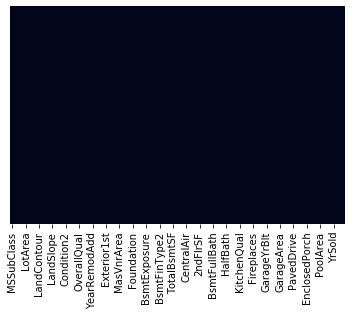

In [22]:
sns.heatmap(all_data.isnull(),yticklabels=False,cbar=False)

Now we can see from this plot we are pretty good with handling the missing data here.Also we can check this from the below code.

In [23]:
all_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [24]:
all_data.dropna(inplace=True)

In [25]:
all_data.shape

(2915, 75)

In [26]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [27]:
#Performing label encoading to categorical columns
from sklearn.preprocessing import OneHotEncoder
categorical_columns = all_data.select_dtypes(exclude=["int64","float64"]).columns
print(categorical_columns[:])

all_data = pd.get_dummies(all_data,drop_first=True)
print(all_data.shape)
print(all_data.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
(2915, 236)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
      

Again Splitting the all_data into train and test parts for prediction:

In [28]:
ntrain = train.shape[0]
ntrain

1460

In [29]:
train_data = all_data[:ntrain]
test_data = all_data[ntrain:]
print(train_data.shape)
print(Y_col.shape)

(1460, 236)
(1460,)


Creating Function for R2 score,mean squared error,median absolute error and also performing Train Test Split:

In [30]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

X_train, X_test, Y_train, Y_test = train_test_split(train_data, Y_col)

In [31]:
def train_fit_model(model, train_values_X, train_values_Y, test_values_X):
    model.fit(train_values_X, train_values_Y)
    return model.predict(test_values_X)

def printMetricsData(predicted_data, test_values_Y):
    print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(test_values_Y, predicted_data)))
    print('R2 score: %.2f' % r2_score(test_values_Y, predicted_data))
    print('Median absolute error: %.2f' % median_absolute_error(test_values_Y, predicted_data))

Using Linear Regression:

In [32]:
regr = linear_model.LinearRegression()
printMetricsData(train_fit_model(regr, X_train, Y_train, X_test),Y_test) 

Mean squared error: 36354.56
R2 score: 0.78
Median absolute error: 15326.40


Using Ridge Regression:

In [38]:
regr_ridge = linear_model.Ridge(alpha = .23, fit_intercept=False, random_state = 5, solver= 'auto', normalize=False)
printMetricsData(train_fit_model(regr_ridge, X_train, Y_train, X_test),Y_test) 

Mean squared error: 36810.05
R2 score: 0.77
Median absolute error: 15782.20
